In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Meghana Tamrakar\Downloads\archive\crime_dataset_india.csv")

In [3]:
df.head(20)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
5,6,02-01-2020 03:00,01-01-2020 05:00,01-01-2020 17:09,Delhi,442,ASSAULT,16,M,Firearm,Violent Crime,18,Yes,30-03-2020 03:00
6,7,01-01-2020 16:00,01-01-2020 06:00,01-01-2020 14:08,Chennai,172,VEHICLE - STOLEN,64,F,Knife,Violent Crime,13,Yes,24-03-2020 16:00
7,8,02-01-2020 10:00,01-01-2020 07:00,02-01-2020 06:33,Chennai,169,COUNTERFEITING,78,X,Knife,Other Crime,8,No,NaN
8,9,04-01-2020 03:00,01-01-2020 08:00,02-01-2020 06:34,Mumbai,338,EXTORTION,41,X,Blunt Object,Other Crime,1,No,NaN
9,10,03-01-2020 07:00,01-01-2020 09:00,01-01-2020 17:50,Chennai,497,PUBLIC INTOXICATION,29,M,Knife,Other Crime,4,No,NaN


In [4]:
df['Date Case Closed'].head(20)

0                  NaN
1                  NaN
2                  NaN
3     29-04-2020 05:00
4     08-01-2020 21:00
5     30-03-2020 03:00
6     24-03-2020 16:00
7                  NaN
8                  NaN
9                  NaN
10    01-02-2020 13:00
11                 NaN
12    29-02-2020 16:00
13                 NaN
14                 NaN
15    30-03-2020 07:00
16                 NaN
17                 NaN
18    24-01-2020 20:00
19    05-03-2020 18:00
Name: Date Case Closed, dtype: object

In [5]:
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce', dayfirst=True)
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce', dayfirst=True)

# Fill missing values in 'Date Case Closed' with 'Date of Occurrence'
df['Date Case Closed'] = df['Date Case Closed'].fillna(df['Date of Occurrence'])

In [6]:
df.head(20)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,2020-01-01 00:00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,2020-01-01 00:00:00
1,2,01-01-2020 19:00,2020-01-01 01:00:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,2020-01-01 01:00:00
2,3,02-01-2020 05:00,2020-01-01 02:00:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,2020-01-01 02:00:00
3,4,01-01-2020 05:00,2020-01-01 03:00:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00
4,5,01-01-2020 21:00,2020-01-01 04:00:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00
5,6,02-01-2020 03:00,2020-01-01 05:00:00,01-01-2020 17:09,Delhi,442,ASSAULT,16,M,Firearm,Violent Crime,18,Yes,2020-03-30 03:00:00
6,7,01-01-2020 16:00,2020-01-01 06:00:00,01-01-2020 14:08,Chennai,172,VEHICLE - STOLEN,64,F,Knife,Violent Crime,13,Yes,2020-03-24 16:00:00
7,8,02-01-2020 10:00,2020-01-01 07:00:00,02-01-2020 06:33,Chennai,169,COUNTERFEITING,78,X,Knife,Other Crime,8,No,2020-01-01 07:00:00
8,9,04-01-2020 03:00,2020-01-01 08:00:00,02-01-2020 06:34,Mumbai,338,EXTORTION,41,X,Blunt Object,Other Crime,1,No,2020-01-01 08:00:00
9,10,03-01-2020 07:00,2020-01-01 09:00:00,01-01-2020 17:50,Chennai,497,PUBLIC INTOXICATION,29,M,Knife,Other Crime,4,No,2020-01-01 09:00:00


In [7]:
df.isnull().sum()

Report Number         0
Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
Date Case Closed      0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Report Number       40160 non-null  int64         
 1   Date Reported       40160 non-null  object        
 2   Date of Occurrence  40160 non-null  datetime64[ns]
 3   Time of Occurrence  40160 non-null  object        
 4   City                40160 non-null  object        
 5   Crime Code          40160 non-null  int64         
 6   Crime Description   40160 non-null  object        
 7   Victim Age          40160 non-null  int64         
 8   Victim Gender       40160 non-null  object        
 9   Weapon Used         40160 non-null  object        
 10  Crime Domain        40160 non-null  object        
 11  Police Deployed     40160 non-null  int64         
 12  Case Closed         40160 non-null  object        
 13  Date Case Closed    40160 non-nu

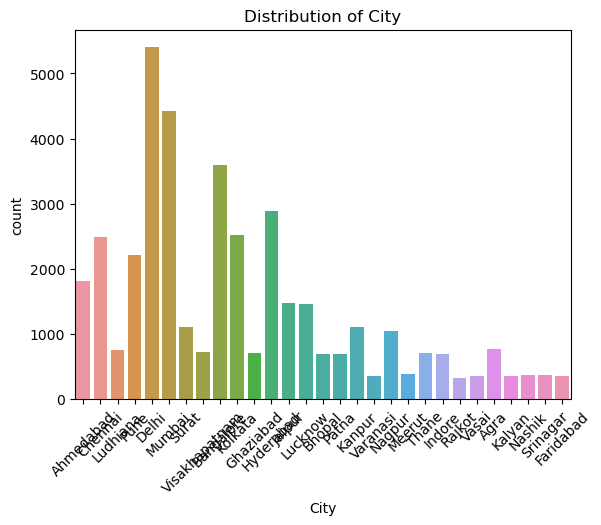

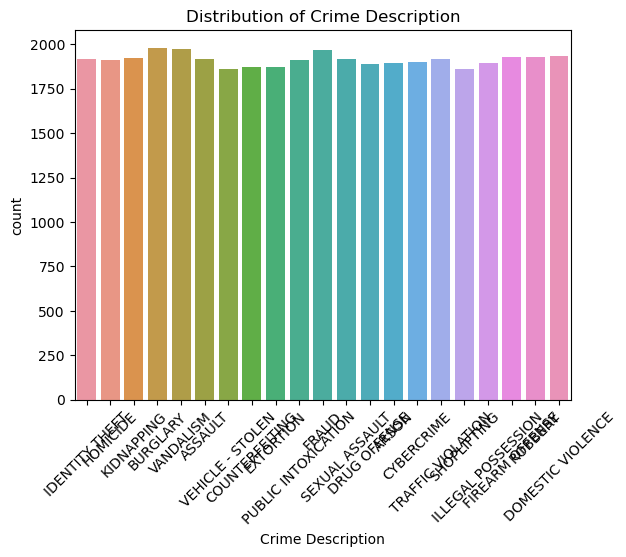

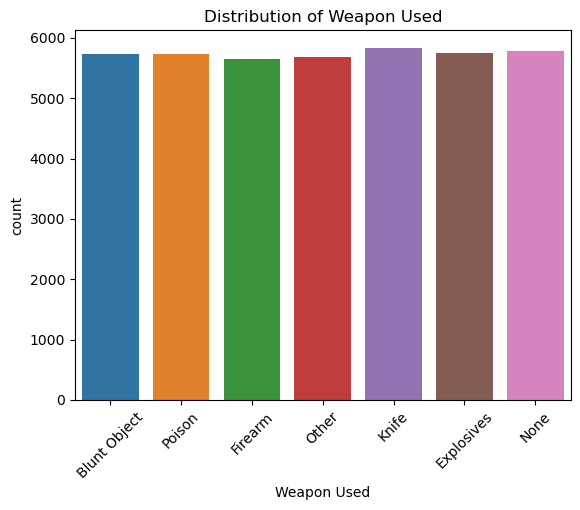

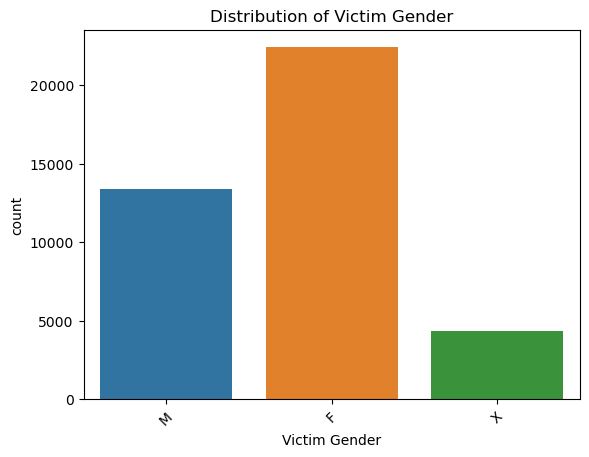

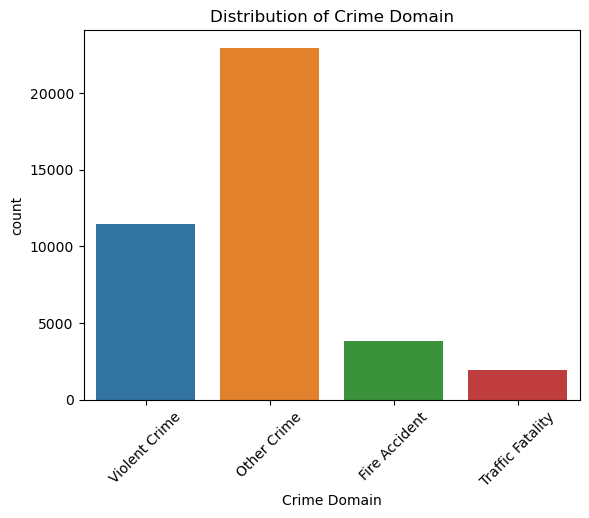

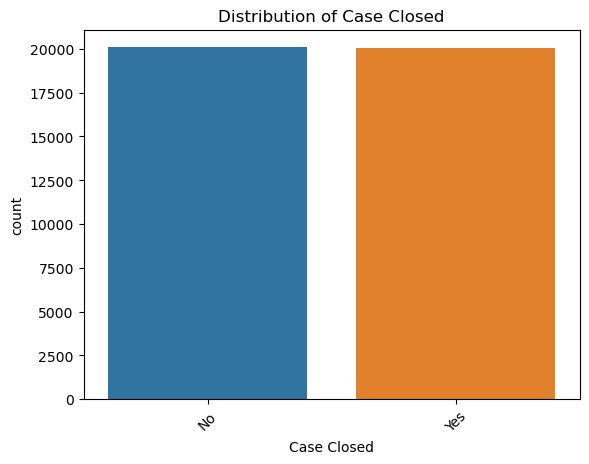


Sample of Encoded DataFrame:
   Report Number     Date Reported  Date of Occurrence Time of Occurrence  \
0              1  02-01-2020 00:00 2020-01-01 00:00:00   01-01-2020 01:11   
1              2  01-01-2020 19:00 2020-01-01 01:00:00   01-01-2020 06:26   
2              3  02-01-2020 05:00 2020-01-01 02:00:00   01-01-2020 14:30   
3              4  01-01-2020 05:00 2020-01-01 03:00:00   01-01-2020 14:46   
4              5  01-01-2020 21:00 2020-01-01 04:00:00   01-01-2020 16:51   

   Crime Code  Victim Age  Police Deployed    Date Case Closed  \
0         576          16               13 2020-01-01 00:00:00   
1         128          37                9 2020-01-01 01:00:00   
2         271          48               15 2020-01-01 02:00:00   
3         170          49                1 2020-04-29 05:00:00   
4         421          30               18 2020-01-08 21:00:00   

   City_Ahmedabad  City_Bangalore  ...  Weapon Used_Knife  Weapon Used_None  \
0               1              

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# View initial information
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize distributions of categorical columns
categorical_columns = ['City', 'Crime Description', 'Weapon Used', 'Victim Gender', 'Crime Domain', 'Case Closed']
for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

# Convert categorical to numerical using encoding
encoded_columns = ['City', 'Crime Description', 'Weapon Used', 'Victim Gender', 'Crime Domain', 'Case Closed']
df_encoded = pd.get_dummies(df, columns=encoded_columns, drop_first=True)

# Save the transformed dataset
df_encoded.to_csv('encoded_dataset.csv', index=False)

print("\nSample of Encoded DataFrame:")
print(df_encoded.head())

In [9]:
df_encoded.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,Crime Code,Victim Age,Police Deployed,Date Case Closed,City_Ahmedabad,City_Bangalore,...,Weapon Used_Knife,Weapon Used_None,Weapon Used_Other,Weapon Used_Poison,Victim Gender_M,Victim Gender_X,Crime Domain_Other Crime,Crime Domain_Traffic Fatality,Crime Domain_Violent Crime,Case Closed_Yes
0,1,02-01-2020 00:00,2020-01-01 00:00:00,01-01-2020 01:11,576,16,13,2020-01-01 00:00:00,1,0,...,0,0,0,0,1,0,0,0,1,0
1,2,01-01-2020 19:00,2020-01-01 01:00:00,01-01-2020 06:26,128,37,9,2020-01-01 01:00:00,0,0,...,0,0,0,1,1,0,1,0,0,0
2,3,02-01-2020 05:00,2020-01-01 02:00:00,01-01-2020 14:30,271,48,15,2020-01-01 02:00:00,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,01-01-2020 05:00,2020-01-01 03:00:00,01-01-2020 14:46,170,49,1,2020-04-29 05:00:00,0,0,...,0,0,0,0,0,0,1,0,0,1
4,5,01-01-2020 21:00,2020-01-01 04:00:00,01-01-2020 16:51,421,30,18,2020-01-08 21:00:00,0,0,...,0,0,1,0,0,0,1,0,0,1


In [10]:
df_encoded.columns


Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'Crime Code', 'Victim Age', 'Police Deployed',
       'Date Case Closed', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal',
       'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan',
       'City_Kanpur', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana',
       'City_Meerut', 'City_Mumbai', 'City_Nagpur', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Srinagar', 'City_Surat',
       'City_Thane', 'City_Varanasi', 'City_Vasai', 'City_Visakhapatnam',
       'Crime Description_ASSAULT', 'Crime Description_BURGLARY',
       'Crime Description_COUNTERFEITING', 'Crime Description_CYBERCRIME',
       'Crime Description_DOMESTIC VIOLENCE', 'Crime Description_DRUG OFFENSE',
       'Crime Description_EXTORTION', 'Crime Description_FIREARM OFFENSE',
       'Crime Description_FRAUD', 'Crime Description

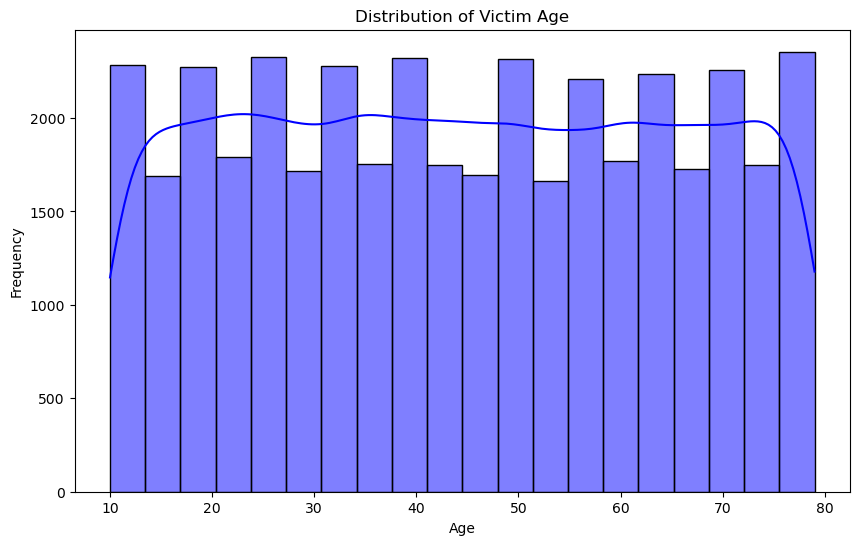

In [11]:
# 1. Victim Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Victim Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


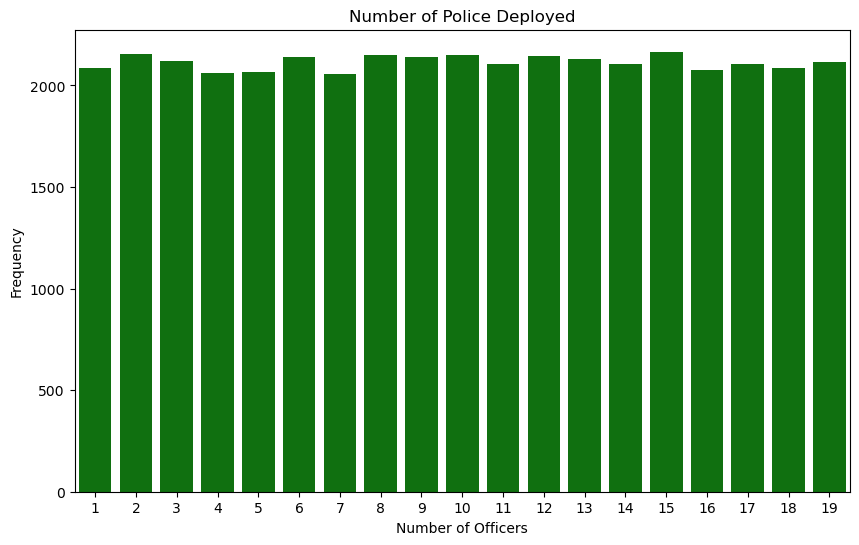

In [12]:
# 2. Police Deployed Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Police Deployed'].value_counts().index, 
            y=df['Police Deployed'].value_counts().values, 
            color='green')
plt.title('Number of Police Deployed')
plt.xlabel('Number of Officers')
plt.ylabel('Frequency')
plt.show()


# If I provide the crime description, year, and city, it should return the crime rate, the estimated number of cases, and the status of whether the cases are closed or not.

##### DATA ANALYSIS FOR THIS

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Year from 'Date of Occurrence'
df['Year'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce').dt.year

In [14]:
df.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed', 'Year'],
      dtype='object')

In [15]:
df.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed', 'Year'],
      dtype='object')

In [16]:
df.head(5)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Year
0,1,02-01-2020 00:00,2020-01-01 00:00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,2020-01-01 00:00:00,2020
1,2,01-01-2020 19:00,2020-01-01 01:00:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,2020-01-01 01:00:00,2020
2,3,02-01-2020 05:00,2020-01-01 02:00:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,2020-01-01 02:00:00,2020
3,4,01-01-2020 05:00,2020-01-01 03:00:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,2020
4,5,01-01-2020 21:00,2020-01-01 04:00:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,2020


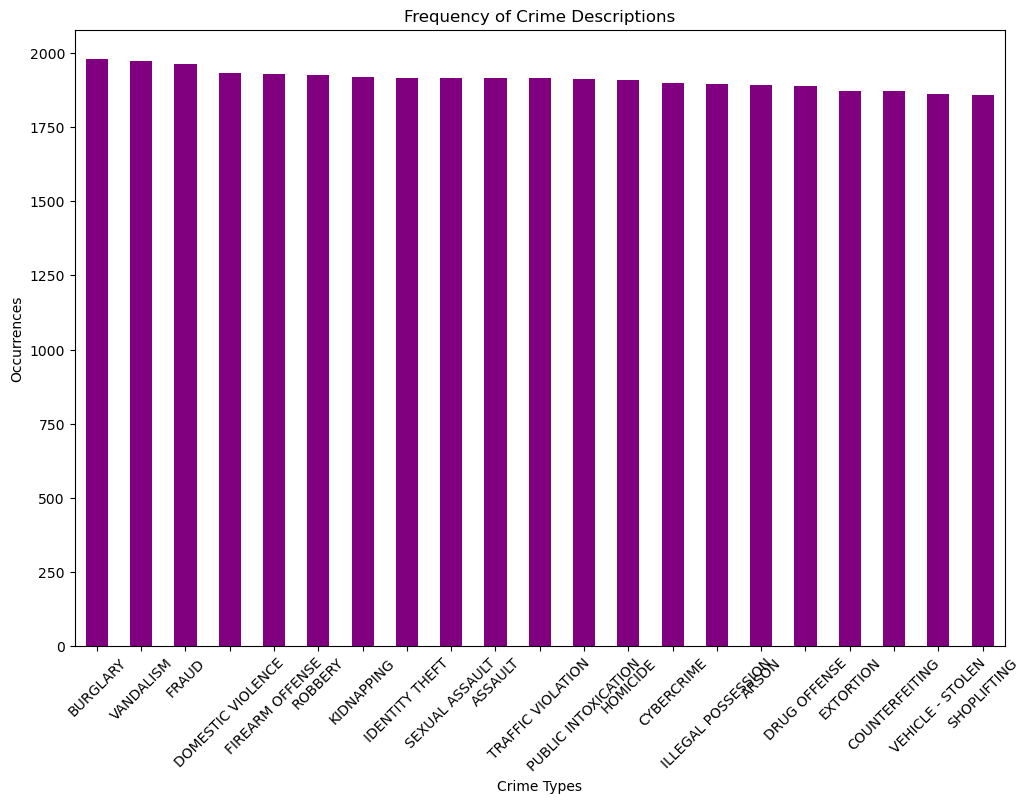

In [17]:
# 1. Crime Description Distribution
plt.figure(figsize=(12, 8))
df['Crime Description'].value_counts().plot(kind='bar', color='purple')
plt.title('Frequency of Crime Descriptions')
plt.xlabel('Crime Types')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()

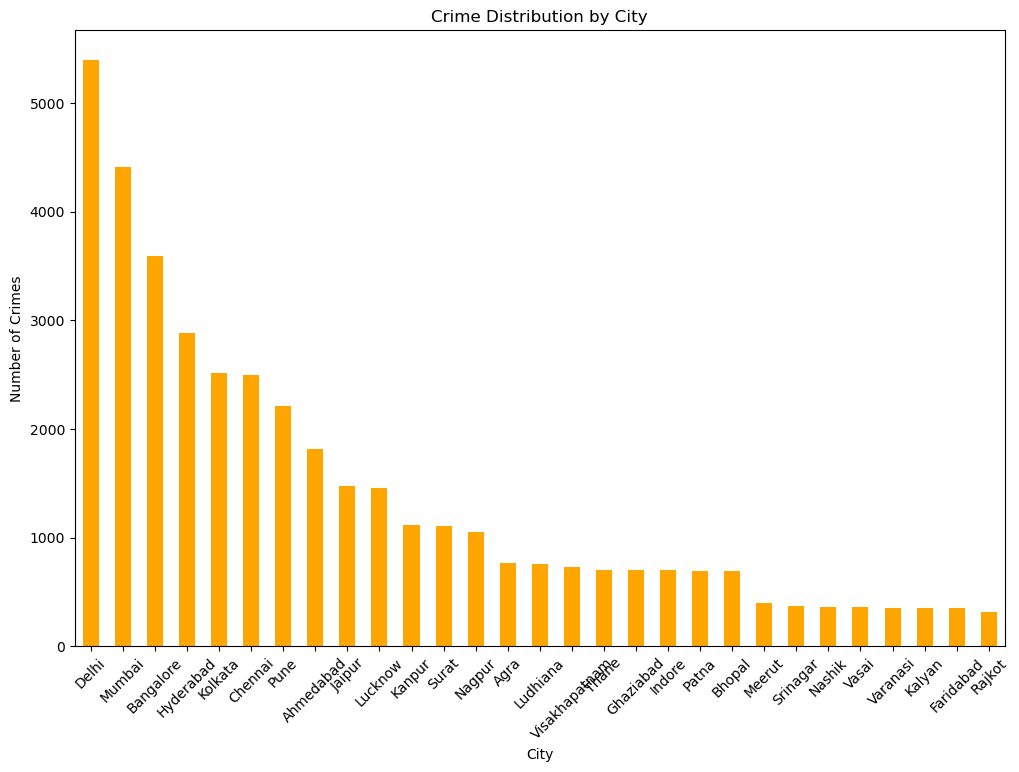

In [18]:
# 2. City-Wise Crime Distribution
plt.figure(figsize=(12, 8))
df['City'].value_counts().plot(kind='bar', color='orange')
plt.title('Crime Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

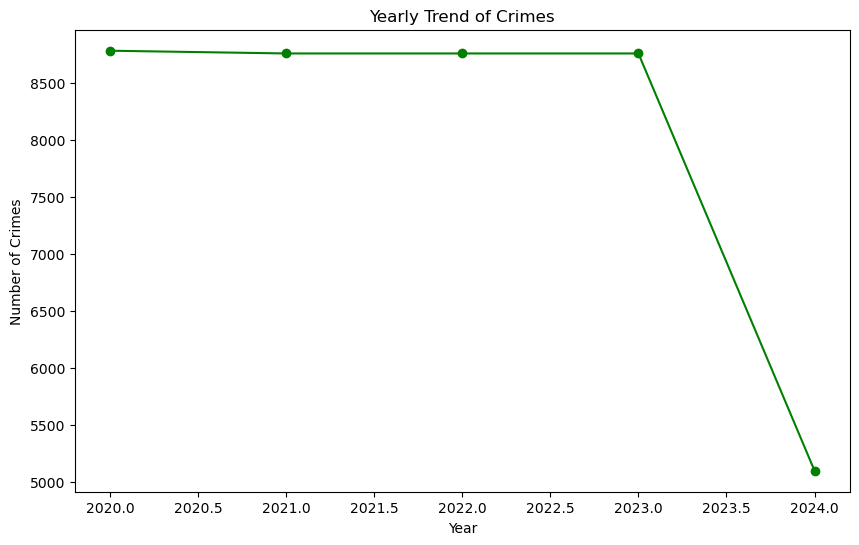

In [19]:
# 3. Yearly Crime Trends
plt.figure(figsize=(10, 6))
df.groupby('Year').size().plot(kind='line', marker='o', color='green')
plt.title('Yearly Trend of Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

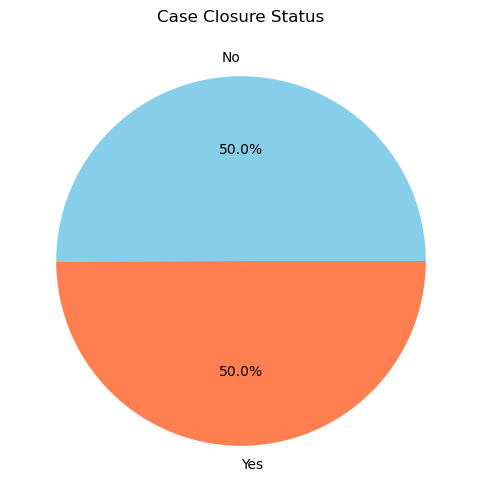

In [20]:
# 4. Case Closure Status
plt.figure(figsize=(8, 6))
df['Case Closed'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'coral'], labels=['No', 'Yes'])
plt.title('Case Closure Status')
plt.ylabel('')  # Remove y-label for clarity
plt.show()

# Model training using RANDOM FOREST

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.preprocessing import OneHotEncoder

In [22]:
# Feature engineering: Extract 'Year'
df['Year'] = pd.to_datetime(df['Date of Occurrence']).dt.year

# Aggregate data for crime rate calculations (example)
df['Crime Count'] = 1
crime_rate_df = df.groupby(['City', 'Year', 'Crime Description']).agg({'Crime Count': 'sum'}).reset_index()

In [23]:
# One-Hot Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first') 

encoded_features = encoder.fit_transform(df[['City', 'Crime Description']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

In [24]:
# Merge encoded features back into the dataframe
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)


In [25]:
# Define inputs (X) and targets (y)
X = df[['Year'] + list(encoded_df.columns)]
y_cases = df['Crime Count']  # For estimating cases
y_closed = df['Case Closed'].map({'Yes': 1, 'No': 0})  # For case status prediction

In [26]:
# Train-test split
X_train, X_test, y_train_cases, y_test_cases = train_test_split(X, y_cases, test_size=0.3, random_state=42)
X_train_cls, X_test_cls, y_train_closed, y_test_closed = train_test_split(X, y_closed, test_size=0.3, random_state=42)

In [27]:
# Train Regression Model for Crime Rate & Cases
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train_cases)


RandomForestRegressor(random_state=42)

In [28]:
regressor.score(X_test, y_test_cases)*100

100.0

In [29]:
# Predict and Evaluate Crime Rate & Cases
y_pred_cases = regressor.predict(X_test)
print("Mean Absolute Error for Cases:", mean_absolute_error(y_test_cases, y_pred_cases))

Mean Absolute Error for Cases: 0.0


In [30]:
# Train Classifier for Case Status
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_cls, y_train_closed)

RandomForestClassifier(random_state=42)

In [31]:
# Predict and Evaluate Case Status
y_pred_closed = classifier.predict(X_test_cls)
print("Classification Report for Case Status:")
print(classification_report(y_test_closed, y_pred_closed))

Classification Report for Case Status:
              precision    recall  f1-score   support

           0       0.49      0.48      0.49      6026
           1       0.49      0.50      0.50      6022

    accuracy                           0.49     12048
   macro avg       0.49      0.49      0.49     12048
weighted avg       0.49      0.49      0.49     12048



In [32]:
accuracy = classifier.score(X_test_cls, y_test_closed)
print("Model Accuracy (score function):", round(accuracy * 100, 2), "%")

Model Accuracy (score function): 49.43 %


# Model training using XGBOOST

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor, XGBClassifier

#Extract 'Year' from date
df['Year'] = pd.to_datetime(df['Date of Occurrence']).dt.year

# Add a helper column for aggregation
df['Crime Count'] = 1

# Aggregate for crime rate calculations
crime_rate_df = df.groupby(['City', 'Year', 'Crime Description']).agg({'Crime Count': 'sum'}).reset_index()

In [34]:
# One-Hot Encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[['City', 'Crime Description']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

#Merge encoded data
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

In [35]:
# Define features (X) and targets (y)
X = df[['Year'] + list(encoded_df.columns)]
y_cases = df['Crime Count']  # for regression
y_closed = df['Case Closed'].map({'Yes': 1, 'No': 0})  # for classification

In [36]:
# Train-test splits
X_train, X_test, y_train_cases, y_test_cases = train_test_split(X, y_cases, test_size=0.3, random_state=42)
X_train_cls, X_test_cls, y_train_closed, y_test_closed = train_test_split(X, y_closed, test_size=0.3, random_state=42)

In [37]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Load sample dataset (you can replace this with your own CSV using pd.read_csv)
data = load_breast_cancer()
X_cls = pd.DataFrame(data.data, columns=data.feature_names)
y_closed = pd.Series(data.target)

# Train-Test Split
X_train_cls, X_test_cls, y_train_closed, y_test_closed = train_test_split(
    X_cls, y_closed, test_size=0.2, random_state=42
)

# Flatten y (important for XGBoost)
y_train_closed = y_train_closed.values.ravel()

# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train the model
xgb_classifier.fit(X_train_cls, y_train_closed)

# Predict
y_pred_closed_xgb = xgb_classifier.predict(X_test_cls)

#  Evaluation
print("📌 Classification Report (XGBoost Classifier):")
print(classification_report(y_test_closed, y_pred_closed_xgb))


C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:51:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Classification Report (XGBoost Classifier):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [38]:
train_accuracy = xgb_classifier.score(X_train_cls, y_train_closed) * 100
test_accuracy = xgb_classifier.score(X_test_cls, y_test_closed) * 100

print(f"XGBoost Training Accuracy: {train_accuracy:.2f}%")
print(f"XGBoost Testing Accuracy: {test_accuracy:.2f}%")


XGBoost Training Accuracy: 100.00%
XGBoost Testing Accuracy: 95.61%


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

df = df.dropna(subset=['Crime Description', 'City', 'Year', 'Crime Count', 'Case Closed'])

# ✅ Convert 'Case Closed' to binary
df['Case_Closed_Binary'] = df['Case Closed'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

In [40]:
# ✅ Encode City and Crime Description
le_city = LabelEncoder()
df['City_Code'] = le_city.fit_transform(df['City'])

le_crime = LabelEncoder()
df['Crime_Code'] = le_crime.fit_transform(df['Crime Description'])

In [41]:
# ✅ Features & Target
features = ['City_Code', 'Crime_Code', 'Year']
target = 'Crime Count'

# ✅ Shuffle to avoid biased splits
df = shuffle(df, random_state=42).reset_index(drop=True)

X = df[features]
y = df[target]

# 🔪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Confirm target has variation
print("Unique target values in y_train:", y_train.nunique())
print("Target distribution:\n", y_train.value_counts().head())



Unique target values in y_train: 1
Target distribution:
 1    32128
Name: Crime Count, dtype: int64


In [42]:
# (Optional) Standardize input features for non-tree models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# 🔹 2. XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("\n📊 XGBoost R² Score:", r2_score(y_test, xgb_preds))
print("📉 XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))




📊 XGBoost R² Score: 1.0
📉 XGBoost RMSE: 0.0


In [44]:
xgb_model.score(X_train, y_train)*100

100.0

In [45]:
train_accuracy = xgb_model.score(X_train, y_train) * 100
test_accuracy = xgb_model.score(X_test, y_test) * 100

print(f"XGBoost Training R²: {train_accuracy:.2f}%")
print(f"XGBoost Testing R²: {test_accuracy:.2f}%")

XGBoost Training R²: 100.00%
XGBoost Testing R²: 100.00%


In [46]:
# 🔹 3. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("\n📊 Random Forest R² Score:", r2_score(y_test, rf_preds))
print("📉 Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))


📊 Random Forest R² Score: 1.0
📉 Random Forest RMSE: 0.0


In [47]:
rf_model.score(X_train, y_train)*100 

100.0

In [49]:
# from sklearn.metrics import accuracy_score

# # Assuming y_test (true labels) and y_pred (predicted labels) are defined
# accuracy = accuracy_score(y_test_closed, y_pred_closed)

# print(f"Model Accuracy: {accuracy * 100:.2f}%")

In [50]:
# Extract additional features from 'Date of Occurrence'
df['Month'] = pd.to_datetime(df['Date of Occurrence']).dt.month
df['Day'] = pd.to_datetime(df['Date of Occurrence']).dt.day

# Drop irrelevant columns
df = df.drop(columns=['Date of Occurrence'])

# Use city population data if available (placeholder example)
city_population = {
    'Mumbai': 20400000,
    'Delhi': 31800000,
    'Chennai': 11300000,
    # Add other cities...
}
df['City Population'] = df['City'].map(city_population)
df['City Population'] = df['City Population'].fillna(df['City Population'].mean())  # Handle missing values

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples at leaf
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [52]:
# Fit the optimized model
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

In [53]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Predict the number or type of crimes expected in a city for upcoming days/months

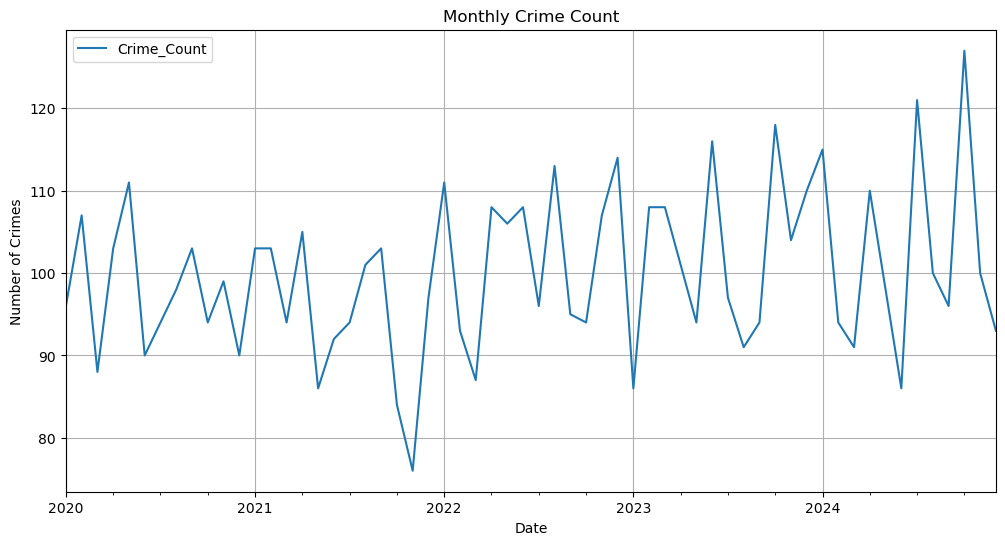

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


📊 Accuracy on Test Set:
✅ MAE  (Mean Absolute Error): 11.15
✅ MSE  (Mean Squared Error): 158.52
✅ RMSE (Root Mean Squared Error): 12.59


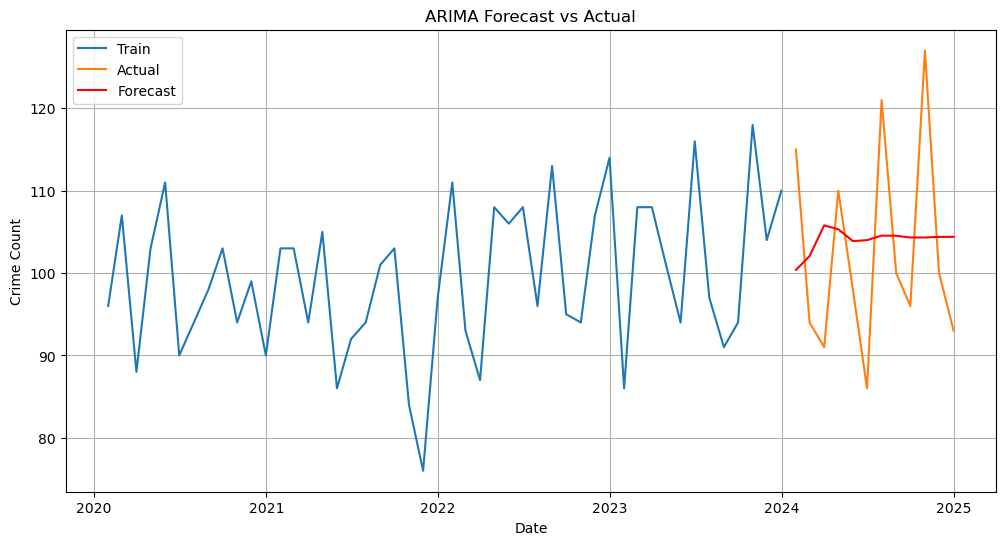


📅 Future Crime Predictions:
            Predicted_Crime_Count
2025-01-31                    NaN
2025-02-28                    NaN
2025-03-31                    NaN
2025-04-30                    NaN
2025-05-31                    NaN
2025-06-30                    NaN
2025-07-31                    NaN
2025-08-31                    NaN
2025-09-30                    NaN
2025-10-31                    NaN
2025-11-30                    NaN
2025-12-31                    NaN


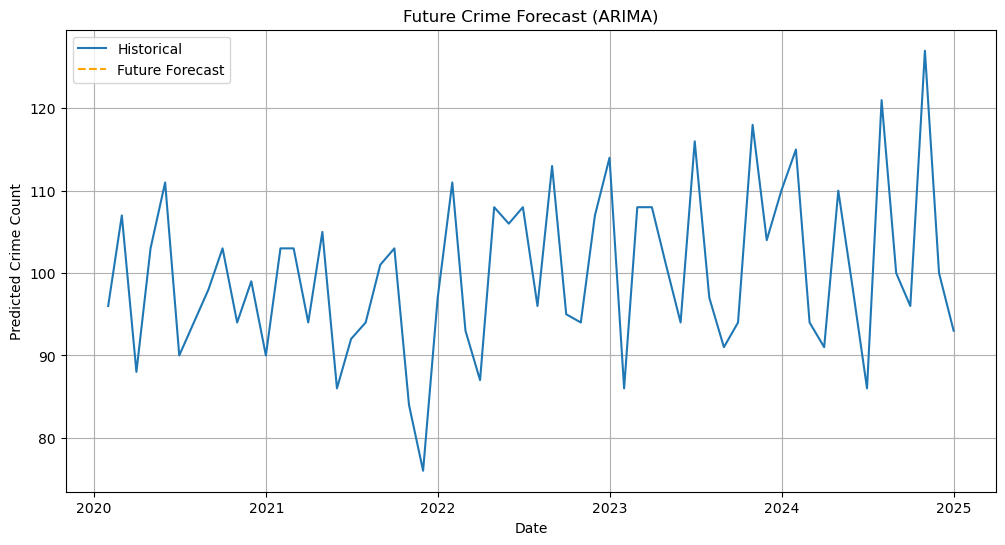

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# ----------------------------------
# ✅ Simulated Monthly Crime Data
# Replace this with your actual data
# ----------------------------------
np.random.seed(42)
date_range = pd.date_range(start="2020-01-01", periods=60, freq='M')
crime_counts = np.random.poisson(lam=100, size=len(date_range))  # Replace with actual crime count

df = pd.DataFrame({'Month': date_range, 'Crime_Count': crime_counts})
df.set_index('Month', inplace=True)

# -----------------------------
# ✅ Plot the Original Data
# -----------------------------
df.plot(figsize=(12, 6), title="Monthly Crime Count")
plt.ylabel("Number of Crimes")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# -----------------------------
# ✅ Train/Test Split
# -----------------------------
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# -----------------------------
# ✅ Fit ARIMA Model
# -----------------------------
model = ARIMA(train, order=(2, 1, 2))  # You can tune (p,d,q)
fitted_model = model.fit()

# -----------------------------
# ✅ Forecasting
# -----------------------------
forecast = fitted_model.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# -----------------------------
# ✅ Evaluation
# -----------------------------
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)

print("📊 Accuracy on Test Set:")
print(f"✅ MAE  (Mean Absolute Error): {mae:.2f}")
print(f"✅ MSE  (Mean Squared Error): {mse:.2f}")
print(f"✅ RMSE (Root Mean Squared Error): {rmse:.2f}")

# -----------------------------
# ✅ Plot Actual vs Forecast
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Crime_Count'], label='Train')
plt.plot(test.index, test['Crime_Count'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# ✅ Predicting Future Crimes
# -----------------------------
future_steps = 12  # Next 12 months
future_forecast = fitted_model.forecast(steps=future_steps)

# Create future index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='M')
future_df = pd.DataFrame({'Predicted_Crime_Count': future_forecast}, index=future_dates)

print("\n📅 Future Crime Predictions:")
print(future_df)

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Crime_Count'], label='Historical')
plt.plot(future_df.index, future_df['Predicted_Crime_Count'], label='Future Forecast', linestyle='--', color='orange')
plt.title("Future Crime Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Predicted Crime Count")
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# Calculate MAPE and Accuracy %
mape = np.mean(np.abs((test['Crime_Count'] - forecast) / test['Crime_Count'])) * 100
accuracy = 100 - mape

print(f"\n📈 Model Accuracy Based on MAPE: {accuracy:.2f}%")



📈 Model Accuracy Based on MAPE: 89.16%


City columns detected: ['City_Ahmedabad', 'City_Bangalore', 'City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad', 'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana', 'City_Meerut', 'City_Mumbai', 'City_Nagpur', 'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Varanasi', 'City_Vasai', 'City_Visakhapatnam']

City crime counts:
 City_Ahmedabad        1817
City_Bangalore        3588
City_Bhopal            690
City_Chennai          2493
City_Delhi            5400
City_Faridabad         354
City_Ghaziabad         704
City_Hyderabad        2881
City_Indore            699
City_Jaipur           1479
City_Kalyan            355
City_Kanpur           1112
City_Kolkata          2518
City_Lucknow          1456
City_Ludhiana          761
City_Meerut            395
City_Mumbai           4415
City_Nagpur           1053
City_Nashik            36

C:\Users\Meghana Tamrakar\AppData\Local\Temp\ipykernel_25316\2814111154.py:36: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


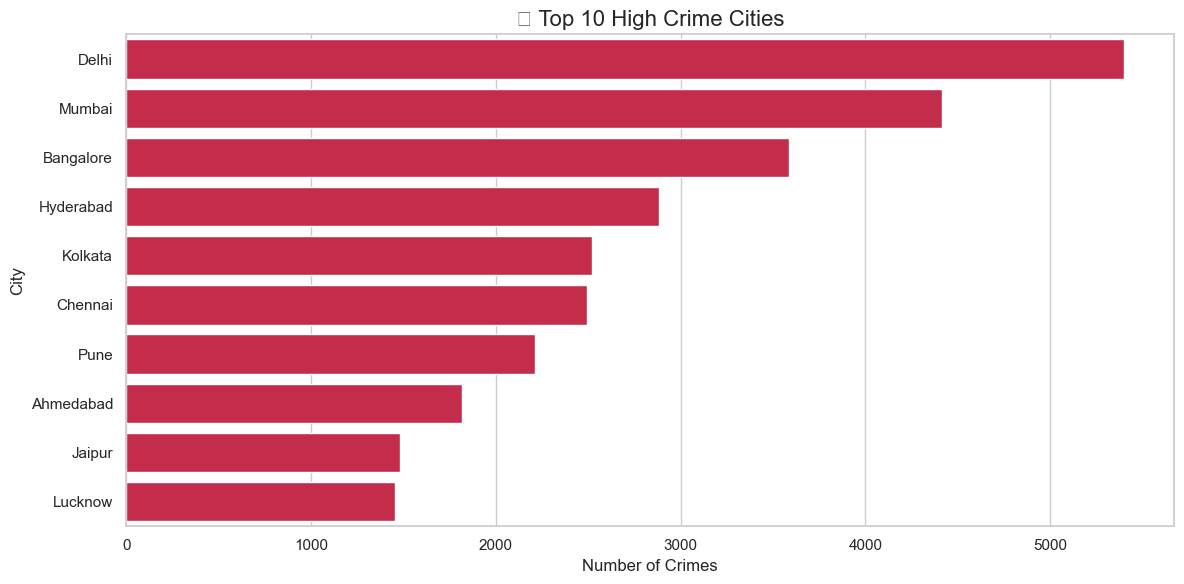

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Extract city columns that are one-hot encoded (start with 'City_')
city_columns = [col for col in df.columns if col.startswith('City_')]
print("City columns detected:", city_columns)

# Step 2: Sum the number of crimes in each city
city_crime_counts = df[city_columns].sum()

# Debug: Check if city_crime_counts is empty
print("\nCity crime counts:\n", city_crime_counts)

# Step 3: Create a DataFrame for plotting
city_crime_df = city_crime_counts.reset_index()
city_crime_df.columns = ['City', 'Total Crimes']
city_crime_df['City'] = city_crime_df['City'].str.replace('City_', '')
city_crime_df['Total Crimes'] = pd.to_numeric(city_crime_df['Total Crimes'], errors='coerce')

# Remove NaN or invalid values
city_crime_df = city_crime_df.dropna()

# Step 4: Get top 10 high-crime cities
top_10 = city_crime_df.sort_values(by='Total Crimes', ascending=False).head(10)

# Debug: Check top 10 values
print("\nTop 10 cities:\n", top_10)

# Step 5: Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, y='City', x='Total Crimes', color='crimson')
plt.title("🔴 Top 10 High Crime Cities", fontsize=16)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()
plt.show()


# IDENTIFYING HIGH CRIME ZONES

using  KMEANS AND DBSCAN

🏙️ Detected City Columns: ['City_Ahmedabad', 'City_Bangalore', 'City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad', 'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana', 'City_Meerut', 'City_Mumbai', 'City_Nagpur', 'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Varanasi', 'City_Vasai', 'City_Visakhapatnam']
🔍 Detected Crime Columns: ['Crime Description_ASSAULT', 'Crime Description_BURGLARY', 'Crime Description_COUNTERFEITING', 'Crime Description_CYBERCRIME', 'Crime Description_DOMESTIC VIOLENCE', 'Crime Description_DRUG OFFENSE', 'Crime Description_EXTORTION', 'Crime Description_FIREARM OFFENSE', 'Crime Description_FRAUD', 'Crime Description_HOMICIDE', 'Crime Description_IDENTITY THEFT', 'Crime Description_ILLEGAL POSSESSION', 'Crime Description_KIDNAPPING', 'Crime Description_PUBLIC INTOXICATION', 'Crime Description_ROBBERY',

C:\Users\Meghana Tamrakar\AppData\Local\Temp\ipykernel_25316\4267205398.py:42: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


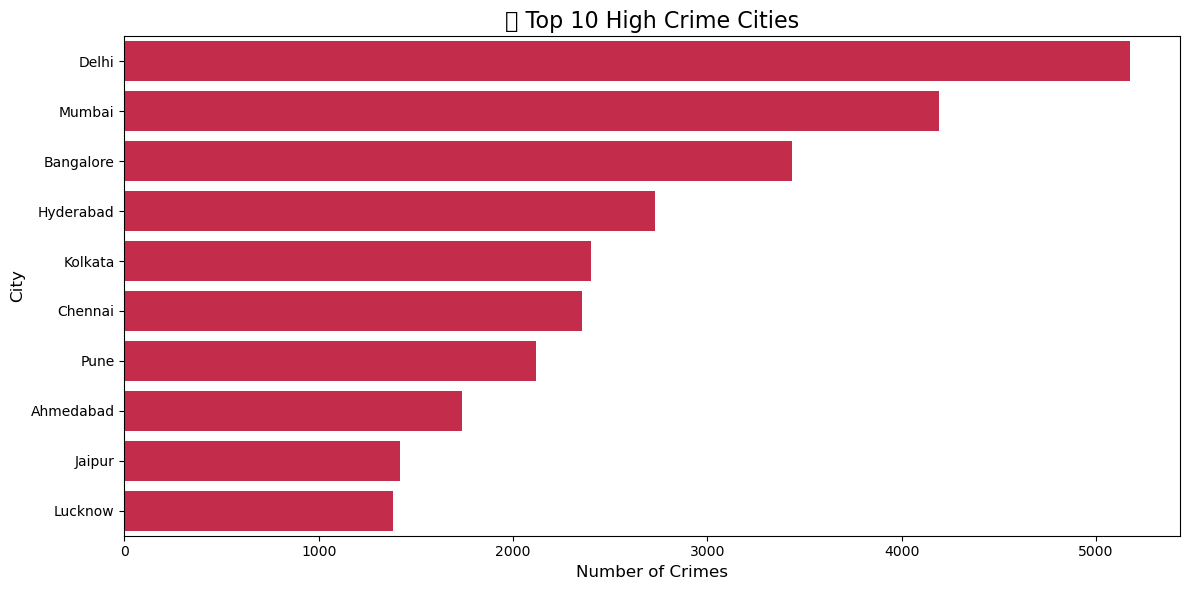

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use your actual DataFrame
df = df_encoded  # replace with your actual DataFrame if needed

# Step 1: Identify city columns (one-hot encoded)
city_columns = [col for col in df.columns if col.startswith('City_')]
print("🏙️ Detected City Columns:", city_columns)

# Step 2: Identify crime-related columns
crime_columns = [col for col in df.columns if 'Crime Description_' in col]
print("🔍 Detected Crime Columns:", crime_columns)

if not city_columns or not crime_columns:
    raise ValueError("❗ Could not find city or crime columns properly.")

# Step 3: Calculate total crimes per city
city_crime_counts = {}

for city in city_columns:
    # Each row where the city is 1 and a crime occurred in any crime column
    total_crimes = df.loc[df[city] == 1, crime_columns].sum(axis=1).sum()
    city_name = city.replace("City_", "")  # Clean city name
    city_crime_counts[city_name] = total_crimes

# Step 4: Create a DataFrame from the dictionary
city_crime_df = pd.DataFrame(city_crime_counts.items(), columns=['City', 'Total Crimes'])

# Step 5: Sort and select top 10
top_10 = city_crime_df.sort_values(by='Total Crimes', ascending=False).head(10)
print("\n🔟 Top 10 High Crime Cities:")
print(top_10)

# Step 6: Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, y='City', x='Total Crimes', color='crimson')
plt.title("🔴 Top 10 High Crime Cities", fontsize=16)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


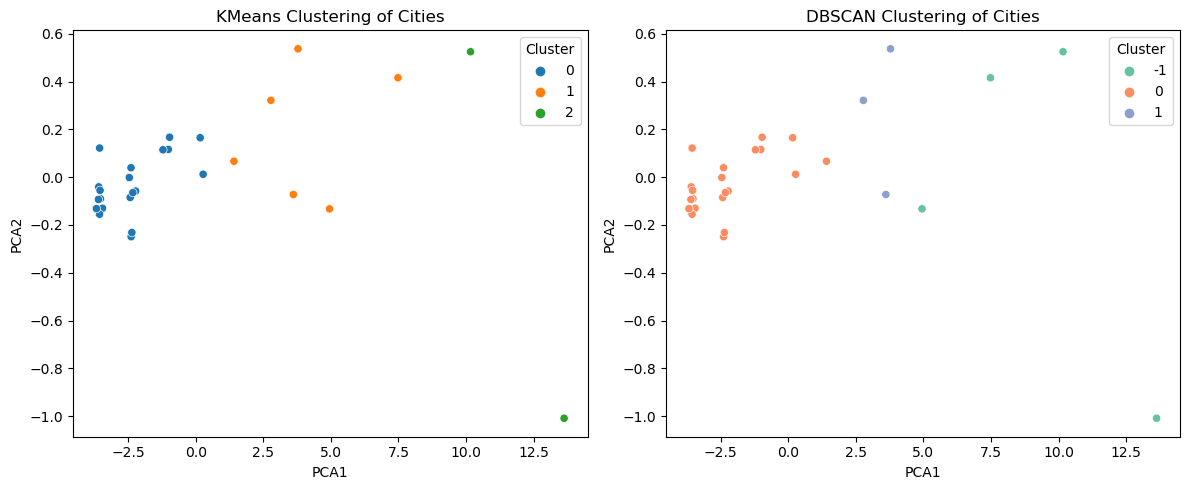

In [77]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: Setup ---
df = df_encoded  # make sure this is defined already

city_columns = [col for col in df.columns if col.startswith('City_')]
crime_columns = [col for col in df.columns if 'Crime Description_' in col]

# --- STEP 2: Aggregate Crime Counts by City ---
city_crime_matrix = []

city_names = []

for city_col in city_columns:
    city_name = city_col.replace('City_', '')
    city_names.append(city_name)

    # Filter rows where this city is 1 and sum the crime columns
    city_rows = df[df[city_col] == 1]
    crime_sums = city_rows[crime_columns].sum().values  # vector of crime type sums
    city_crime_matrix.append(crime_sums)

# Convert to DataFrame
city_crime_df = pd.DataFrame(city_crime_matrix, columns=crime_columns, index=city_names)

# --- STEP 3: Normalize Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(city_crime_df)

# --- STEP 4: KMeans Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
city_crime_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# --- STEP 5: DBSCAN Clustering ---
dbscan = DBSCAN(eps=1.5, min_samples=2)
city_crime_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# --- STEP 6: PCA for Visualization ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
city_crime_df['PCA1'] = pca_result[:, 0]
city_crime_df['PCA2'] = pca_result[:, 1]

# --- STEP 7: Plot Clusters ---
plt.figure(figsize=(12, 5))

# KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(data=city_crime_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10')
plt.title("KMeans Clustering of Cities")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")

# DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(data=city_crime_df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='Set2')
plt.title("DBSCAN Clustering of Cities")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()


Cluster 0 (blue) seems to be the largest group — these cities probably have average crime stats.

Cluster 1 (orange) might include cities with distinct or moderately high counts in specific crime types.

Cluster 2 (green) has only 2 cities, likely the most extreme cases — either very high or very low in crime count or specific types (could be outliers).

Right Plot: DBSCAN Clustering of Cities
Cluster -1 (green) = Outliers — cities that don't belong to any dense group.

Cluster 0 (orange) = Main cluster — most cities are grouped here.

Cluster 1 (blue) = Small subgroup — these cities might share a unique pattern, such as dominance in a particular crime like cybercrime, assault, etc.

In [79]:
import pandas as pd

# Step 1: Identify city columns from one-hot encoding
city_columns = [col for col in df_encoded.columns if col.startswith('City_')]
cities = [col.replace('City_', '') for col in city_columns]

# Step 2: Create a 'City' column from one-hot encoded values
df_encoded['City'] = df_encoded[city_columns].idxmax(axis=1).str.replace('City_', '')

# Step 3: Get unique city list (just to be sure)
unique_cities = df_encoded['City'].unique()

# Step 4: Create a DataFrame for city-level data (if not already created)
# This is the data you used for clustering — ensure it's in this form:
# Aggregated city-level data and same order as clustering was performed on
city_data = df_encoded.groupby('City').mean().reset_index()

# Step 5: Assign cluster labels
city_data['KMeans_Cluster'] = kmeans.labels_
city_data['DBSCAN_Cluster'] = dbscan.labels_

# Step 6: Group and print cities by KMeans cluster
print("🏙️ Cities in each KMeans Cluster:\n")
for cluster_id, cluster_cities in city_data.groupby('KMeans_Cluster')['City']:
    print(f"🔹 Cluster {cluster_id}: {', '.join(cluster_cities)}")

# Step 7: Group and print cities by DBSCAN cluster
print("\n🏙️ Cities in each DBSCAN Cluster:\n")
for cluster_id, cluster_cities in city_data.groupby('DBSCAN_Cluster')['City']:
    label = "Noise (-1)" if cluster_id == -1 else f"Cluster {cluster_id}"
    print(f"🔸 {label}: {', '.join(cluster_cities)}")


🏙️ Cities in each KMeans Cluster:

🔹 Cluster 0: Bhopal, Faridabad, Ghaziabad, Indore, Jaipur, Kalyan, Kanpur, Lucknow, Ludhiana, Meerut, Nagpur, Nashik, Patna, Rajkot, Srinagar, Surat, Thane, Varanasi, Vasai, Visakhapatnam
🔹 Cluster 1: Ahmedabad, Bangalore, Chennai, Hyderabad, Kolkata, Pune
🔹 Cluster 2: Delhi, Mumbai

🏙️ Cities in each DBSCAN Cluster:

🔸 Noise (-1): Bangalore, Delhi, Hyderabad, Mumbai
🔸 Cluster 0: Ahmedabad, Bhopal, Faridabad, Ghaziabad, Indore, Jaipur, Kalyan, Kanpur, Lucknow, Ludhiana, Meerut, Nagpur, Nashik, Patna, Rajkot, Srinagar, Surat, Thane, Varanasi, Vasai, Visakhapatnam
🔸 Cluster 1: Chennai, Kolkata, Pune


C:\Users\Meghana Tamrakar\AppData\Local\Temp\ipykernel_25316\196319624.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


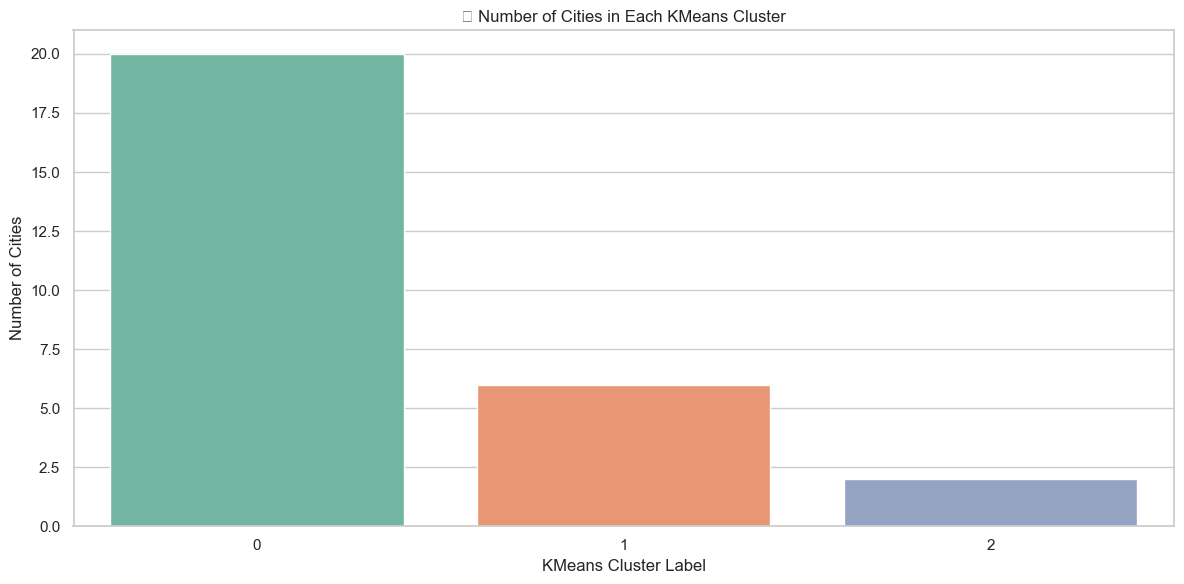

C:\Users\Meghana Tamrakar\AppData\Local\Temp\ipykernel_25316\196319624.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


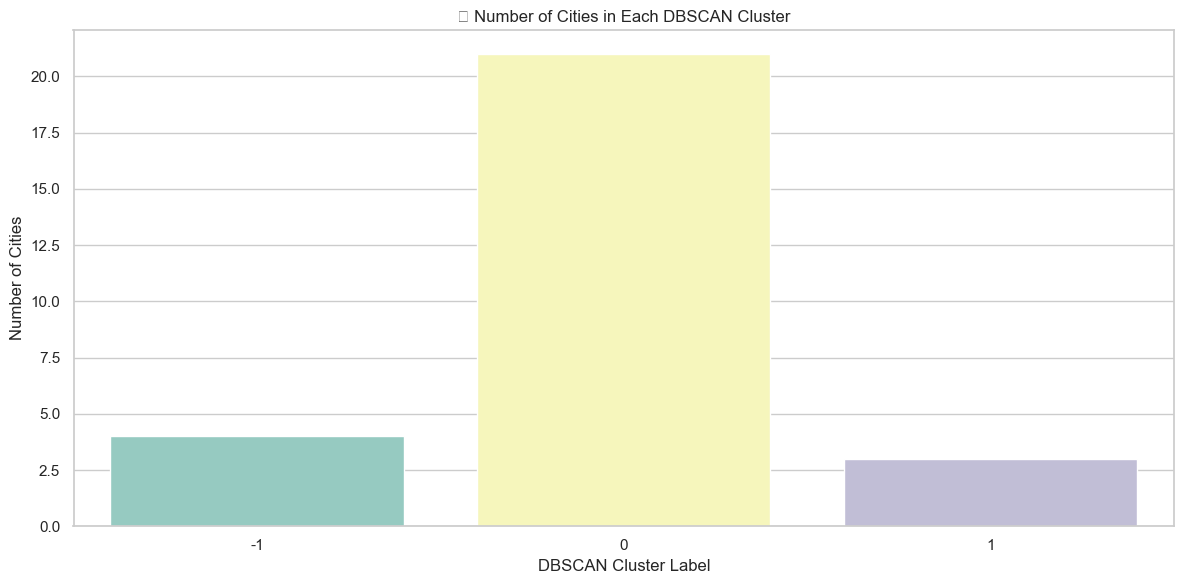

C:\Users\Meghana Tamrakar\AppData\Local\Temp\ipykernel_25316\196319624.py:33: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  plt.tight_layout()
C:\Users\Meghana Tamrakar\AppData\Local\Temp\ipykernel_25316\196319624.py:33: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


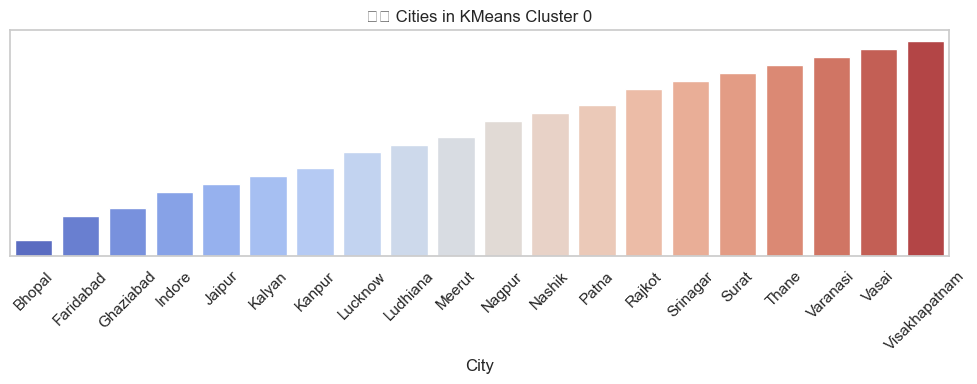

C:\Users\Meghana Tamrakar\AppData\Local\Temp\ipykernel_25316\196319624.py:33: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  plt.tight_layout()
C:\Users\Meghana Tamrakar\AppData\Local\Temp\ipykernel_25316\196319624.py:33: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


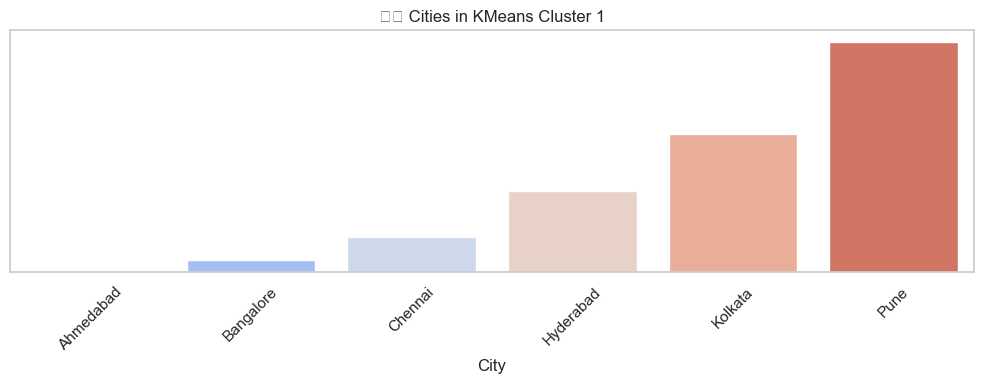

C:\Users\Meghana Tamrakar\AppData\Local\Temp\ipykernel_25316\196319624.py:33: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  plt.tight_layout()
C:\Users\Meghana Tamrakar\AppData\Local\Temp\ipykernel_25316\196319624.py:33: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


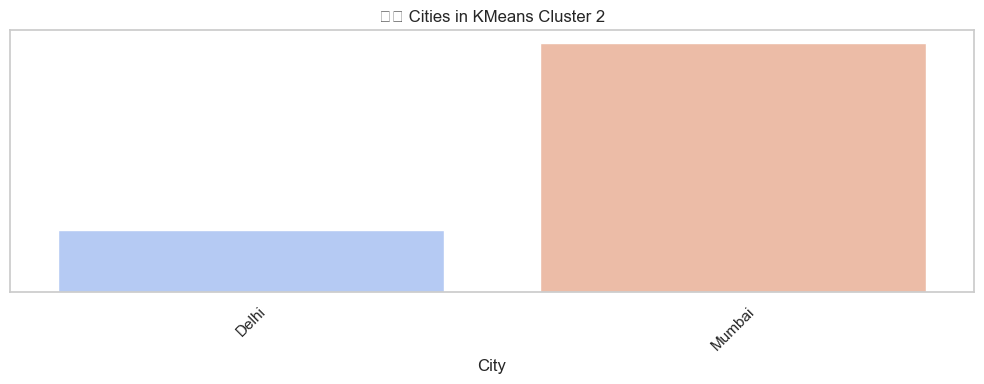

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Step 1: Visualize KMeans Clusters
plt.figure(figsize=(12, 6))
sns.countplot(data=city_data, x='KMeans_Cluster', order=sorted(city_data['KMeans_Cluster'].unique()), palette='Set2')
plt.title("📊 Number of Cities in Each KMeans Cluster")
plt.xlabel("KMeans Cluster Label")
plt.ylabel("Number of Cities")
plt.tight_layout()
plt.show()

# Step 2: Visualize DBSCAN Clusters
plt.figure(figsize=(12, 6))
sns.countplot(data=city_data, x='DBSCAN_Cluster', order=sorted(city_data['DBSCAN_Cluster'].unique()), palette='Set3')
plt.title("📊 Number of Cities in Each DBSCAN Cluster")
plt.xlabel("DBSCAN Cluster Label")
plt.ylabel("Number of Cities")
plt.tight_layout()
plt.show()

# Optional: Show cities in each KMeans cluster as barplot
for cluster_id, cluster_cities in city_data.groupby('KMeans_Cluster'):
    plt.figure(figsize=(10, 4))
    sns.barplot(x=cluster_cities['City'], y=cluster_cities.index, palette='coolwarm')
    plt.title(f"🏙️ Cities in KMeans Cluster {cluster_id}")
    plt.xlabel("City")
    plt.yticks([])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
